In [17]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sb.set()

In [18]:
stockCSV = pd.read_csv('stockdata.csv')

In [19]:
stockCSV['Foodsum'] = stockCSV['KE=F']+stockCSV['ZR=F']

In [20]:
stockCSV = stockCSV.dropna(how='any') #Cleaning Null Values

In [21]:
stockCSV['Foodsum'] = stockCSV['Foodsum'].round(3)
stockCSV['CL=F'] = stockCSV['CL=F'].round(3)
stockCSV['NG=F'] = stockCSV['NG=F'].round(3)
stockCSV['SQM'] = stockCSV['SQM'].round(3)

stockCSV['GC=F'] = stockCSV['GC=F'].round(3)
stockCSV['ZF=F'] = stockCSV['ZF=F'].round(3)
stockCSV['BRK-A'] = stockCSV['BRK-A'].round(3)
stockCSV['TSLA'] = stockCSV['TSLA'].round(3)

In [22]:
Wheat = pd.DataFrame(stockCSV['KE=F'])
Rice = pd.DataFrame(stockCSV['ZR=F'])
Food = pd.DataFrame(stockCSV['Foodsum'])

Crude = pd.DataFrame(stockCSV['CL=F'])
Nat = pd.DataFrame(stockCSV['NG=F'])

Fert = pd.DataFrame(stockCSV['SQM'])

Gold = pd.DataFrame(stockCSV['GC=F'])
Bonds = pd.DataFrame(stockCSV['ZF=F'])

Berkshire = pd.DataFrame(stockCSV['BRK-A'])
Tesla = pd.DataFrame(stockCSV['TSLA'])

Date = pd.DataFrame(stockCSV['Date'])

# Machine Learning (2)
### via XGBoost

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

!pip install xgboost
import xgboost as xgb

Date.head()

,Date
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-07
4,2013-01-08


In [24]:
stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date'])
stockCSV.head()

,Date,BRK-A,CL=F,GC=F,KE=F,NG=F,SQM,TSLA,ZF=F,ZR=F,Foodsum,Dateint
0,2013-01-02,139610.0,93.12,1687.9,811.00,3.233,33.891,2.357,124.188,1475.5,2286.50,2013-01-02
1,2013-01-03,140549.0,92.92,1673.7,811.25,3.198,33.654,2.318,123.945,1478.0,2289.25,2013-01-03
2,2013-01-04,140803.0,93.09,1648.1,804.50,3.287,33.625,2.293,123.891,1503.0,2307.50,2013-01-04
3,2013-01-07,140190.0,93.19,1645.5,807.50,3.266,33.381,2.289,123.906,1497.5,2305.00,2013-01-07
4,2013-01-08,141000.0,93.15,1661.5,808.75,3.218,33.410,2.245,124.031,1496.0,2304.75,2013-01-08


Mean Squared Error: 228758.42979405064


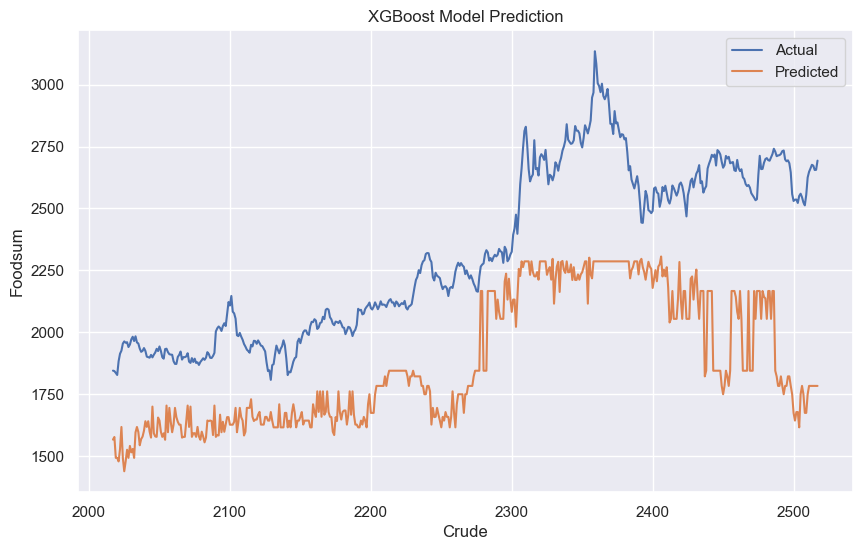

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming stockCSV is your DataFrame
stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date']) 

# Create a DataFrame
data = pd.DataFrame({
    'Time': stockCSV["Dateint"],  # Assuming 'Dateint' is the column with time values
    'Predictor': stockCSV['CL=F'],  # Assuming 'CL=F' is the predictor column
    'Response': stockCSV['Foodsum']  # Assuming 'FoodSum' is the response column
})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data[['Predictor']], data['Response'], test_size=0.2, shuffle=False)  # Assuming chronological order

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Define the model
model.fit(x_train, y_train)  # Train the model

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Crude')  # Change 'Index' to a suitable label for your x-axis
plt.ylabel('Foodsum')
plt.title('XGBoost Model Prediction')
plt.legend()
plt.show()

Mean Squared Error: 590313.9464610827


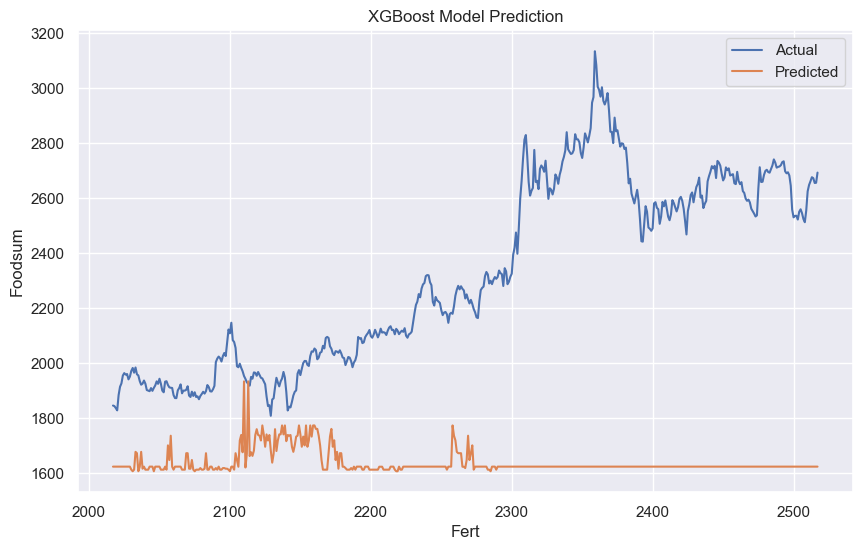

In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming stockCSV is your DataFrame
stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date']) 

# Create a DataFrame
data = pd.DataFrame({
    'Time': stockCSV["Dateint"],  # Assuming 'Dateint' is the column with time values
    'Predictor': stockCSV['SQM'],  # Assuming 'CL=F' is the predictor column
    'Response': stockCSV['Foodsum']  # Assuming 'FoodSum' is the response column
})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data[['Predictor']], data['Response'], test_size=0.2, shuffle=False)  # Assuming chronological order

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Define the model
model.fit(x_train, y_train)  # Train the model

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Fert')  # Change 'Index' to a suitable label for your x-axis
plt.ylabel('Foodsum')
plt.title('XGBoost Model Prediction')
plt.legend()
plt.show()